<a href="https://colab.research.google.com/github/parmigggiana/ml-ids/blob/main/IDS_CICIDS2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web attack detection using CICIDS2017 dataset

This is an edited version of the original https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

Training data: "Intrusion Detection Evaluation Dataset" (CICIDS2017). Description page: https://www.unb.ca/cic/datasets/ids-2017.html

The data set is public. Download link: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/

CICIDS2017 combines 8 files recorded on different days of observation (PCAP + CSV). Used archive: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/GeneratedLabelledFlows.zip

In the downloaded archive GeneratedLabelledFlows.zip the file "Thursday" Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv is selected.

Sources:

* [Sharafaldin2018] Iman Sharafaldin, Arash Habibi Lashkari and Ali A. Ghorbani. Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization. 2018
* [Kostas2018] Kahraman Kostas. Anomaly Detection in Networks Using Machine Learning. 2018 (error was found in assessing the importance of features)
* https://github.com/bozbil/Anomaly-Detection-in-Networks-Using-Machine-Learning (error was found in assessing the importance of features)

## Data preprocessing

Source: https://github.com/bozbil/Anomaly-Detection-in-Networks-Using-Machine-Learning/blob/master/01_preprocessing.ipynb [Kostas2018].

In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

I will use the corrected CIC-IDS-2017 instead of the original.

In [51]:
!wget https://intrusion-detection.distrinet-research.be/CNS2022/Datasets/CICIDS2017_improved.zip -O dataset.zip
!unzip -u dataset.zip

Using encoding='latin' avoids the UnicodeDecodeError we get otherwise

In [133]:
from pathlib import Path
li = []
for filename in Path('.').glob('*.csv'):
  li.append(pd.read_csv(filename, index_col=0, encoding='latin'))
df = pd.concat(li, axis=0, ignore_index=True)

In [136]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,192.168.10.5-192.168.10.3-49159-445-6,192.168.10.5,49159,192.168.10.3,445,6,2017-07-04 11:53:44.398274,90030854,10,10,...,57,2.998751e+07,3.559250e+04,30013373,29946916,-1,-1,90030854,BENIGN,-1
1,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-04 11:54:12.355218,106007973,26,0,...,19,1.981684e+07,8.154881e+06,27220170,7234941,-1,-1,0,BENIGN,-1
2,192.168.10.5-192.168.10.3-123-123-17,192.168.10.5,123,192.168.10.3,123,17,2017-07-04 11:54:32.240412,64015367,4,4,...,139,6.401513e+07,0.000000e+00,64015127,64015127,-1,-1,0,BENIGN,-1
3,192.168.10.3-192.168.10.1-60280-53-17,192.168.10.3,60280,192.168.10.1,53,17,2017-07-04 11:55:07.615878,46870,1,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1
4,192.168.10.3-192.168.10.1-61995-53-17,192.168.10.3,61995,192.168.10.1,53,17,2017-07-04 11:54:12.427035,62958,1,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099971,172.16.0.1-192.168.10.50-64318-2222-6,172.16.0.1,64318,192.168.10.50,2222,6,2017-07-07 18:09:11.499555,64,1,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,64,Portscan,-1
2099972,172.16.0.1-192.168.10.50-33248-9040-6,172.16.0.1,33248,192.168.10.50,9040,6,2017-07-07 17:54:38.857717,76,1,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,76,Portscan,-1
2099973,172.16.0.1-192.168.10.50-44033-1272-6,172.16.0.1,44033,192.168.10.50,1272,6,2017-07-07 17:52:03.285040,81,1,1,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,81,Portscan,-1
2099974,192.168.10.16-192.168.10.3-64748-53-17,192.168.10.16,64748,192.168.10.3,53,17,2017-07-07 18:33:45.701233,297,2,2,...,0,0.000000e+00,0.000000e+00,0,0,-1,-1,0,BENIGN,-1


In [135]:
df.shape

(2099976, 90)

As for the differences between the features, aside for a couple of names that changed slightly, the corrected datasets adds 5 features: 'Fwd RST Flags', 'Bwd RST Flags', 'ICMP Code', 'ICMP Type', 'Total TCP Flow Time'. It also removed the duplicated feature 'Fwd Header Length.1'.
Other than that, there's a column 'Attempted'. This should not be treated as a feature by the machine learning model. As suggested by the paper authors, we treat all those samples ad benign.

In [ ]:
def clean_attempted(row):
  if row['Attempted Category'] != -1:
    row['Label'] = 'BENIGN'
  return row

df = df.apply(clean_attempted, axis=1)
df = df.drop(columns='Attempted Category')

When assessing the distribution of labels, it turns out that out of 362076 records there are many blank records ("BENIGN" - benign background traffic) - 290169 to be exact.

In [55]:
df['Label'].unique()

array(['BENIGN', 'Web Attack - Brute Force', 'Infiltration',
       'Infiltration - Portscan', 'Web Attack - XSS',
       'Web Attack - SQL Injection'], dtype=object)

In [56]:
df['Label'].value_counts()

BENIGN                        290169
Infiltration - Portscan        71767
Web Attack - Brute Force          73
Infiltration                      36
Web Attack - XSS                  18
Web Attack - SQL Injection        13
Name: Label, dtype: int64

Delete blank records. This shouldn't make a difference since the new dataset already has no blank records.

In [57]:
df = df.drop(df[pd.isnull(df['Flow ID'])].index)
df.shape

(362076, 91)

The "Flow Bytes/s" and "Flow Packets/s" columns have non-numerical values, replace them.

In [58]:
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

Replace the NaN values and infinity values with -1.

In [59]:
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

Convert string characters to numbers, use LabelEncoder, not OneHotEncoder.

In [60]:
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']

In [61]:
le = preprocessing.LabelEncoder()
df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))

### Undersampling against unbalance

Dataset is unbalanced: total records = 362076, "BENIGN" records = 290169, records with attacks much less: 73 + 36 + 18 + 13 = 140.
There's 71767 port scans which aren't attacks per-se, but they represent malicious intent.
This shows how the corrected dataset is much more imbalanced than the original one for certain classes that were mislabeled

In [62]:
benign_total = len(df[df['Label'] == "BENIGN"])
benign_total

290169

In [63]:
attack_total = len(df[df['Label'] != "BENIGN"])
attack_total

71907

In [64]:
df.to_csv("web_attacks_unbalanced.csv", index=False)
df['Label'].value_counts()

BENIGN                        290169
Infiltration - Portscan        71767
Web Attack - Brute Force          73
Infiltration                      36
Web Attack - XSS                  18
Web Attack - SQL Injection        13
Name: Label, dtype: int64

We use **undersampling** to correct class imbalances: we remove most of the "BENIGN" records.

Form a balanced dataset web_attacks_balanced.csv in proportion: 70% benign data, 20% portscan and 10% the remaining attacks (1400 total: 140 attacks, 280 portscans, 980 benign).

Algorithm to form a balanced df_balanced dataset:

* All the records with the attacks are copied to the new dataset.
* There are two conditions for copying "BENIGN" records to the new dataset:

     1. The next record is copyied with the benign_inc_probability.
     2. The total number of "BENIGN" records must not exceed the limit of 5087 records.

Сalculate the probability of copying a "BENIGN" record.

In [65]:
total_samples = len(df[df['Label'].match(r'.*Attack.*')])*10
benign_included_max = round(total_samples * 0.7)
benign_inc_probability = benign_included_max / benign_total
print(benign_included_max, benign_inc_probability)
portscan_included_max = round(total_samples * 0.2)
portscan_inc_probability = portscan_included_max / len(df[df['Label'] == "Infiltration - Portscan"])
print(portscan_included_max, portscan_inc_probability)

980 0.0033773421695632547


Copy records from df to df_balanced, save dataset **web_attacks_balanced.csv**.

In [66]:
import random
indexes = []
benign_included_count = 0
portscan_included_count = 0
for index, row in df.iterrows():
    if (row['Label'] == "BENIGN"):
      # Have we achieved 70% (980 records)?
      if benign_included_count > benign_included_max: continue
      # Copying with benign_inc_probability
      if random.random() > benign_inc_probability: continue
      benign_included_count += 1

    if (row['Label'] == "Infiltration - Portscan"):
      # Have we achieved 20% (280 records)?
      if portscan_included_count > portscan_included_max: continue
      # Copying with benign_inc_probability
      if random.random() > portscan_inc_probability: continue
      portscan_included_count += 1

    indexes.append(index)

df_balanced = df.loc[indexes]

In [67]:
df_balanced['Label'].value_counts()

BENIGN                        962
Infiltration - Portscan       281
Web Attack - Brute Force       73
Infiltration                   36
Web Attack - XSS               18
Web Attack - SQL Injection     13
Name: Label, dtype: int64

In [69]:
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

### Preparing data for training

In [70]:
df = pd.read_csv('web_attacks_balanced.csv')

The Label column is encoded as follows: "BENIGN" = 0, attack = 1.

In [71]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

7 features (Flow ID, Source IP, Source Port, Destination IP, Destination Port, Protocol, Timestamp) are excluded from the dataset. The hypothesis is that the "shape" of the data being transmitted is more important than these attributes. In addition, ports and addresses can be substituted by an attacker, so it is better that the ML algorithm does not take these features into account in training [Kostas2018].

In [73]:
excluded = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp']
df = df.drop(columns=excluded)

KeyError: ignored

In [76]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(1383, 83) (1383,)


## Feature importance

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 684, 1: 284}

### Visualization of the decision tree, importance evaluation using a single tree (DecisionTreeClassifier)

In the beginning we use one tree - for the convenience of visualization of the classifier. High cross-validation scores even with 5 leaves look suspiciously good, we should look at the data carefully. Parameters for change - test_size in the cell above (train_test_split), max_leaf_nodes in the cell below.

By changing the **random_state** parameter, we will get different trees and different features with the highest importance. But the forest will already average individual trees below.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=2)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.99404017, 0.99243101, 0.99219262, 0.99094052, 0.99296698,
       0.99260937, 0.99254977, 0.99183455, 0.99243056, 0.99290738])

In [32]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

|--- Flow Duration <= 125.50
|   |--- FWD Init Win Bytes <= 888.00
|   |   |--- class: 0
|   |--- FWD Init Win Bytes >  888.00
|   |   |--- class: 1
|--- Flow Duration >  125.50
|   |--- SYN Flag Count <= 7.50
|   |   |--- Bwd RST Flags <= 1.50
|   |   |   |--- class: 0
|   |   |--- Bwd RST Flags >  1.50
|   |   |   |--- class: 0
|   |--- SYN Flag Count >  7.50
|   |   |--- class: 1



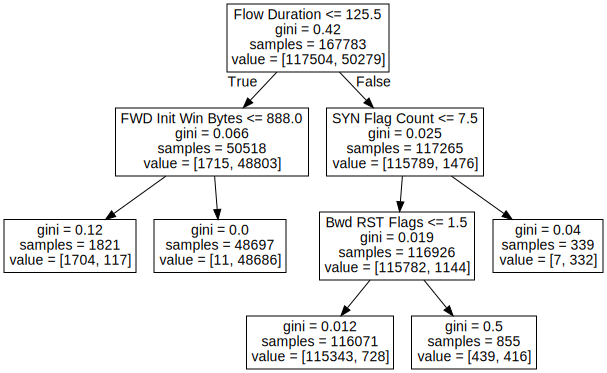

In [33]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=X.columns))

Analyze the confusion matrix. Which classes are confidently classified by the model?

In [34]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 50280, 1: 21628}

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50271,     9],
       [  558, 21070]])

### Importance evaluation using SelectFromModel (still one decision tree)

Source: https://github.com/oreilly-mlsec/book-resources/blob/master/chapter2/select-from-model-nslkdd.ipynb

In [36]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_

array([0.        , 0.93997147, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00573327, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00930544, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04498983, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
sfm.threshold_

0.012048192771084338

In [38]:
X_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

Original num features: 83, selected num features: 2


In [39]:
indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))

0.	Flow Duration - 0.9399714681602617
1.	FWD Init Win Bytes - 0.04498982558630904
2.	SYN Flag Count - 0.009305437772681054
3.	Bwd RST Flags - 0.005733268480748258
4.	Attempted Category - 0.0
5.	Bwd IAT Max - 0.0
6.	Fwd IAT Std - 0.0
7.	Fwd IAT Max - 0.0
8.	Fwd IAT Min - 0.0
9.	Bwd IAT Total - 0.0


### Evaluation of importance using RandomForestClassifier.feature_importances_ (move from one tree to a random forest, classification quality increases)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 1.00 
R^2 Validation Score: 1.00 
Out-of-bag Score: 1.00


We select all the features with importance at least 1%

In [102]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices):
    if importances[i] >= 0.01:
      webattack_features.append(features[i])
    print(f'{index+1}. \t #{i} \t {importances[i]:.3f} \t {features[i]}')

1. 	 #38 	 0.131 	 Fwd Packets/s
2. 	 #1 	 0.105 	 Flow Duration
3. 	 #16 	 0.101 	 Flow IAT Mean
4. 	 #18 	 0.092 	 Flow IAT Max
5. 	 #15 	 0.057 	 Flow Packets/s
6. 	 #41 	 0.049 	 Packet Length Max
7. 	 #42 	 0.045 	 Packet Length Mean
8. 	 #6 	 0.043 	 Fwd Packet Length Max
9. 	 #14 	 0.041 	 Flow Bytes/s
10. 	 #55 	 0.031 	 Fwd Segment Size Avg
11. 	 #10 	 0.029 	 Bwd Packet Length Max
12. 	 #4 	 0.028 	 Total Length of Fwd Packet
13. 	 #54 	 0.025 	 Average Packet Size
14. 	 #8 	 0.024 	 Fwd Packet Length Mean
15. 	 #64 	 0.021 	 Subflow Fwd Bytes
16. 	 #56 	 0.017 	 Bwd Segment Size Avg
17. 	 #5 	 0.016 	 Total Length of Bwd Packet
18. 	 #12 	 0.014 	 Bwd Packet Length Mean
19. 	 #70 	 0.012 	 Fwd Seg Size Min
20. 	 #67 	 0.010 	 FWD Init Win Bytes
21. 	 #81 	 0.009 	 Total TCP Flow Time
22. 	 #46 	 0.007 	 SYN Flag Count
23. 	 #68 	 0.007 	 Bwd Init Win Bytes
24. 	 #37 	 0.007 	 Bwd Header Length
25. 	 #66 	 0.007 	 Subflow Bwd Bytes
26. 	 #69 	 0.006 	 Fwd Act Data Pkts
27. 	 

Visualize what we're left with

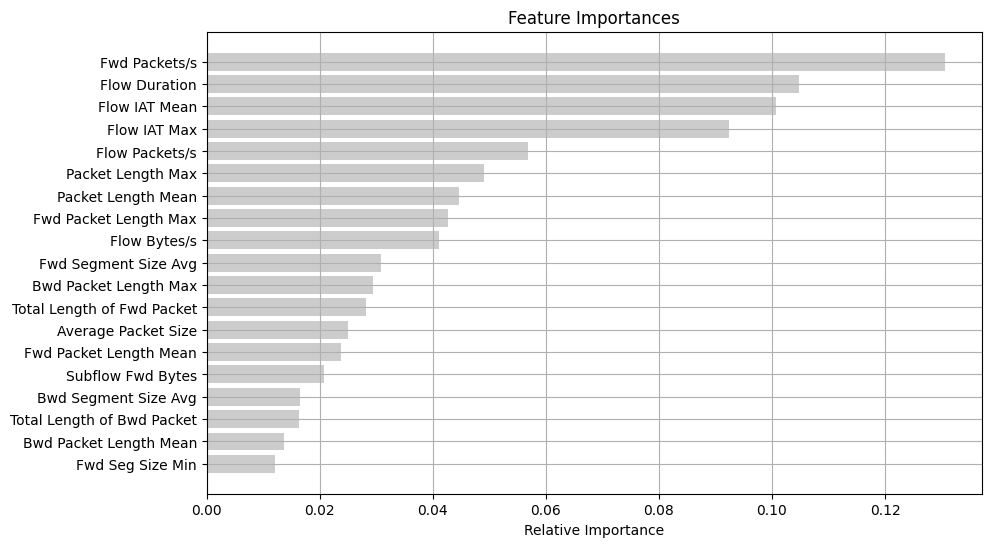

In [103]:
indices = np.argsort(importances)[-len(webattack_features):]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[265,  13],
       [  0, 137]])

## Analysis of selected features

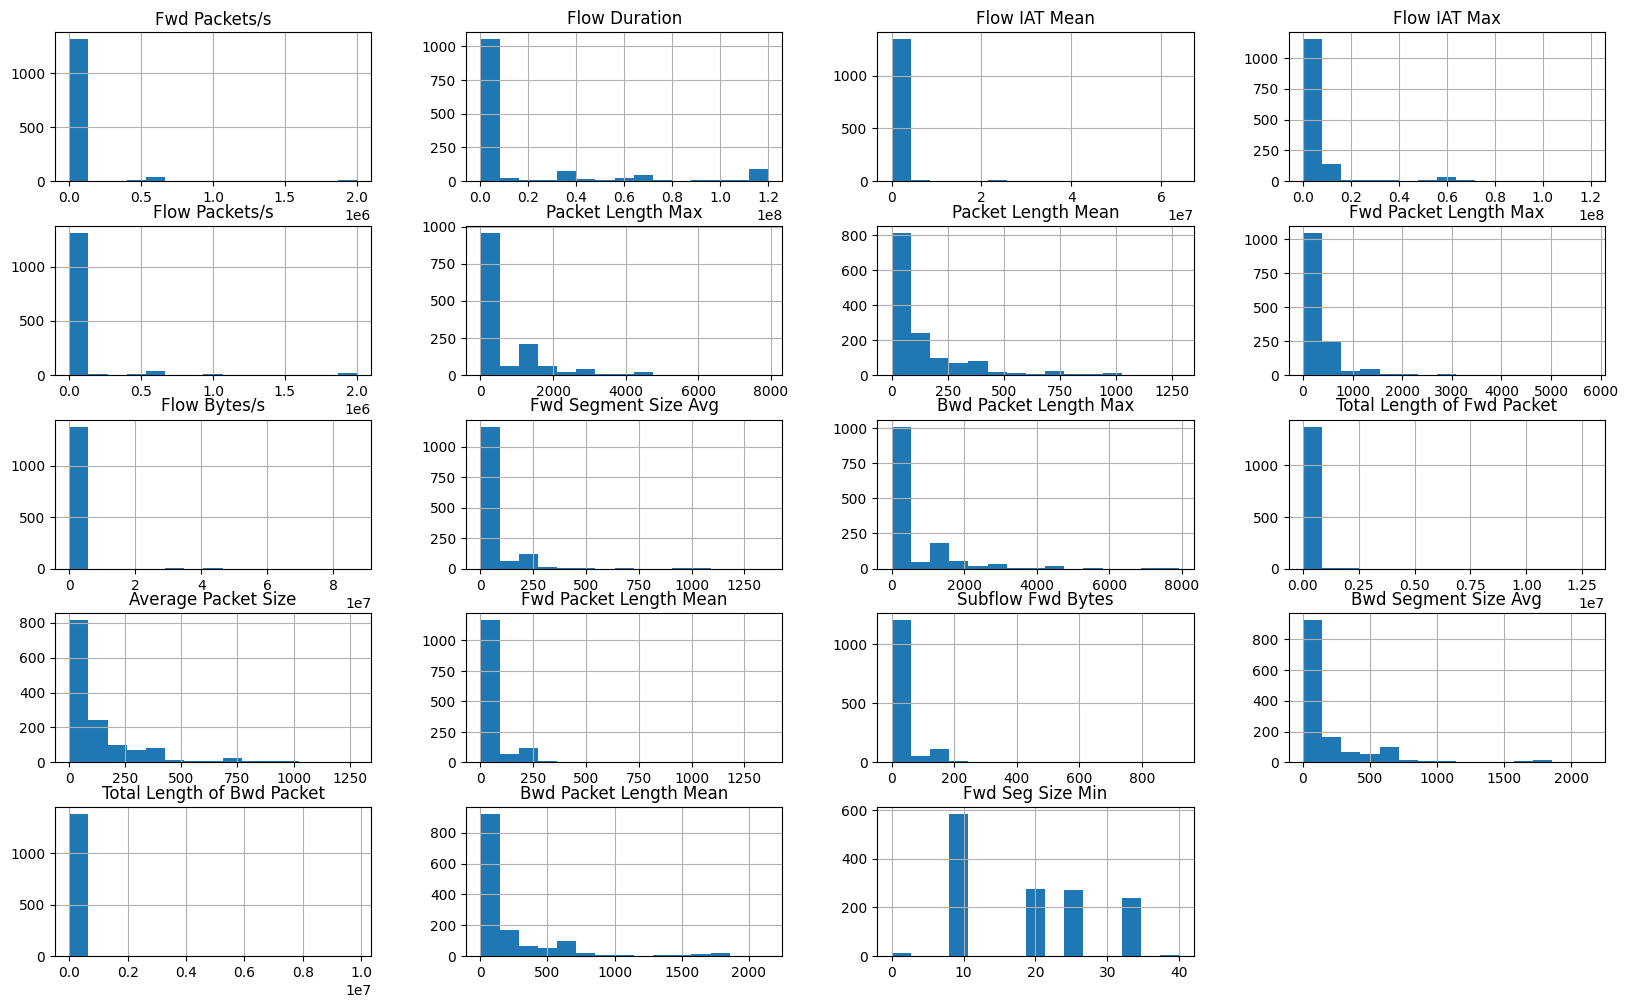

In [95]:
df[webattack_features].hist(figsize=(20,12), bins=15);
plt.show()
#plt.savefig('features_hist.png', dpi=300)

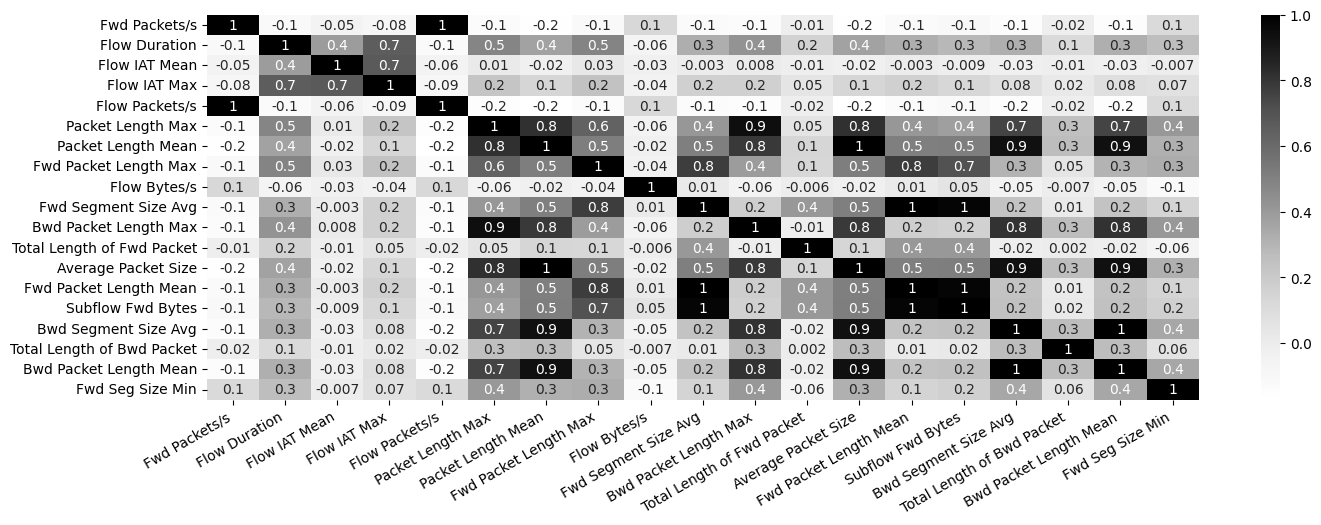

In [104]:
import seaborn as sns
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

Remove correlated features.

In [105]:
to_be_removed = {'Packet Length Mean', 'Fwd Segment Size Avg', 'Fwd Packet Length Mean', 'Average Packet Size', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Average Packet size'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]

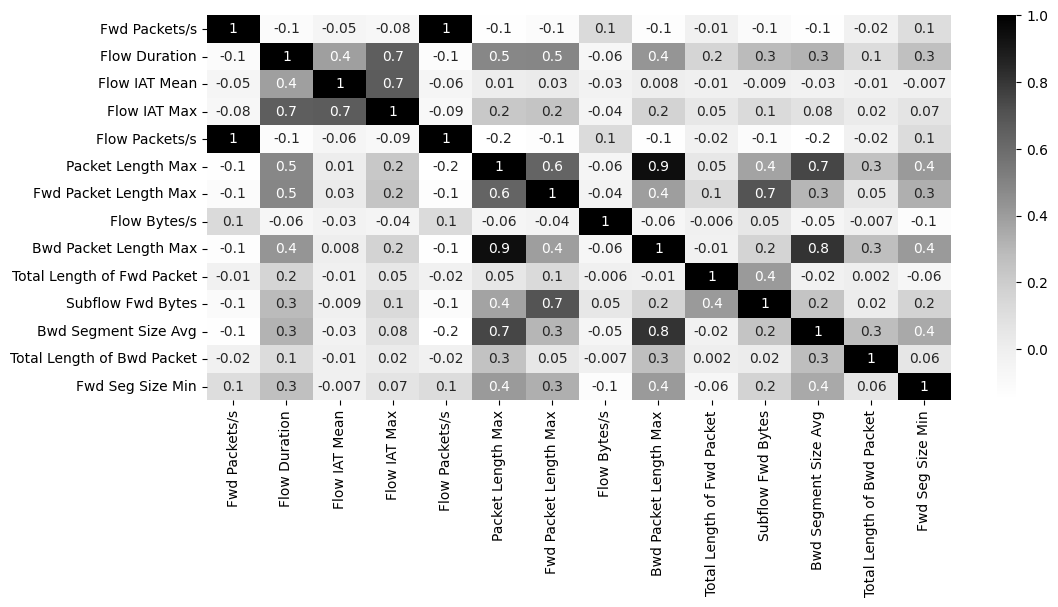

In [110]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (12, 5)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys');

## Hyperparameter selection

Reopen the dataset.

In [111]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values
X = df[webattack_features]
print(X.shape, y.shape)

(1383, 14) (1383,)


We get the list of RandomForestClassifier parameters.

In [114]:
rfc = RandomForestClassifier(criterion='gini', random_state=6)

### Grid search

In [128]:
parameters = {'n_estimators': [20, 25, 30, 35, 50, 80],
              'min_samples_leaf': [4, 3, 2],
              'max_features': ['sqrt', 'log2', 5, 8, 14, None],
              'max_depth': [3, 5, 8, 12, None]}

In [129]:
gcv = GridSearchCV(rfc, parameters, scoring='f1', refit='f1', cv=3, return_train_score=True)
get_ipython().run_line_magic('time', 'gcv.fit(X, y)')

CPU times: user 4min 9s, sys: 886 ms, total: 4min 10s
Wall time: 4min 13s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 8, 12, None],
                         'max_features': ['sqrt', 'log2', 5, 8, 14, None],
                         'min_samples_leaf': [4, 3, 2],
                         'n_estimators': [20, 25, 30, 35, 50, 80]},
             refit='f1', return_train_score=True, scoring='f1')

Let's take a look at the results of the parameter selection.

In [130]:
gcv.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 30}

In [132]:
gcv.best_score_

0.9580588493631971

## Final model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(167783, 10) (167783,)
(71908, 10) (71908,)


In [ ]:
rfc = RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=2, n_estimators=25, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=2,
                       n_estimators=25, oob_score=True, random_state=42)

In [ ]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#1	0.414	Flow Duration
2.	#2	0.214	Flow IAT Mean
3.	#0	0.200	Fwd Packets/s
4.	#3	0.042	Flow Bytes/s
5.	#4	0.042	Fwd Packet Length Max
6.	#7	0.041	Total Length of Fwd Packet
7.	#9	0.036	Fwd Seg Size Min
8.	#8	0.005	Bwd Packet Length Mean
9.	#5	0.003	Subflow Fwd Bytes
10.	#6	0.003	Total Length of Bwd Packet


In [ ]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[167765,     19],
       [    19,  71888]])

In [ ]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9998414625496994
Precision = 0.9997357698137872
Recall = 0.9997357698137872
F1 = 0.9997357698137872


## Model saving

In [ ]:
import pickle
with open('webattack_detection_rf_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

## Model approbation

Open the previously saved model.

In [ ]:
with open('webattack_detection_rf_model.pkl', 'rb') as f:
    rfc = pickle.load(f)
rfc

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=2,
                       n_estimators=25, oob_score=True, random_state=42)

Reopen the dataset.

In [ ]:
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y_test = df['Label'].values
X_test = df[webattack_features]
print(X_test.shape, y_test.shape)

(239691, 10) (239691,)


If necessary, we will work with our own dataset.

In [ ]:
#df = pd.read_csv('mix_labelled.csv')
#y_test = df['Label'].values
#X_test = df[webattack_features]
#print(X_test.shape, y_test.shape)

In [ ]:
X_test.head()

,Fwd Packets/s,Flow Duration,Flow IAT Mean,Flow Bytes/s,Fwd Packet Length Max,Subflow Fwd Bytes,Total Length of Bwd Packet,Total Length of Fwd Packet,Bwd Packet Length Mean,Fwd Seg Size Min
0,1.250568,119945515,8.050035e+05,0.000000,0,0,0,0,0.000000,0
1,0.424420,113095465,1.592894e+06,174.012282,403,134,10012,9668,417.166667,32
2,0.599258,113473706,1.060502e+06,212.225377,403,105,12718,11364,317.950000,32
3,0.618310,116446503,9.868348e+05,246.241830,1313,112,15294,13380,325.404255,32
4,3.246936,63752405,3.094777e+05,263.629270,153,81,0,16807,0.000000,8


In [ ]:
import time
seconds = time.time()
y_pred = rfc.predict(X_test)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.5159633159637451 seconds
Benign records detected (0), attacks detected (1):


{0: 167784, 1: 71907}

Confusion matrix:

      0  1 - predicted value (Wikipedia uses different convention for axes)
    0 TN FP
    1 FN TP

In [ ]:
confusion_matrix(y_test, y_pred)

array([[167765,     19],
       [    19,  71888]])

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9998414625496994
Precision = 0.9997357698137872
Recall = 0.9997357698137872
F1 = 0.9997357698137872


Manual calculation of the confusion matrix:

    array([[5075,   12],
           [   1, 2179]], dtype=int64)

      0  1 - predicted value (Wikipedia uses different convention for axes)
    0 TN FP
    1 FN TP

    Точность
    Precision = TP / (TP + FP) = 2179 / (2179 + 12) = 0.9945230488361478

    Полнота
    Recall = TP / (TP + FN) = 2179 / (2179 + 1) = 0.9995412844036697

    F-мера, параметр = 1, гармоническое среднее точности и полноты, множитель = 2
    F1 = 2 * (precision * recall) / (precision + recall) = 0.9970258522077328

    Доля правильных ответов
    Accuracy = TP + TN / (TP + TN + FP + FN) = (2179 + 5075) / 7267 = 0.998211091234347

In [ ]:
predict = pd.DataFrame({'Predict': rfc.predict(X_test)})
label = pd.DataFrame({'Label': y_test})
result = X_test.join(label).join(predict)

In [ ]:
result[result['Predict'] == 1]

,Fwd Packets/s,Flow Duration,Flow IAT Mean,Flow Bytes/s,Fwd Packet Length Max,Subflow Fwd Bytes,Total Length of Bwd Packet,Total Length of Fwd Packet,Bwd Packet Length Mean,Fwd Seg Size Min,Label,Predict
15152,5.786723,35253111,114458.152597,3292.957606,602,142,72181,43906,687.438095,32,1,1
25115,30303.030303,33,33.000000,0.000000,0,0,0,0,0.000000,32,0,1
25116,18518.518519,54,54.000000,0.000000,0,0,0,0,0.000000,32,0,1
25117,34482.758621,29,29.000000,0.000000,0,0,0,0,0.000000,32,0,1
35943,46.028132,119991834,10861.938445,23887.992245,1274,259,287,2866077,0.051946,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239686,500000.000000,4,4.000000,0.000000,0,0,0,0,0.000000,24,1,1
239687,41666.666667,48,48.000000,0.000000,0,0,0,0,0.000000,24,1,1
239688,41666.666667,48,48.000000,0.000000,0,0,0,0,0.000000,24,1,1
239689,666666.666667,3,3.000000,0.000000,0,0,0,0,0.000000,24,1,1


In [ ]:
result[410:430]

,Fwd Packets/s,Flow Duration,Flow IAT Mean,Flow Bytes/s,Fwd Packet Length Max,Subflow Fwd Bytes,Total Length of Bwd Packet,Total Length of Fwd Packet,Bwd Packet Length Mean,Fwd Seg Size Min,Label,Predict
410,38.846266,51485,1.716167e+04,4.311936e+03,37,18,148,74,74.000000,8,0,0
411,11111.111111,180,6.000000e+01,1.400000e+06,31,15,190,62,95.000000,8,0,0
412,0.029391,68047862,2.268262e+07,2.821543e+00,48,24,96,96,48.000000,8,0,0
413,0.050869,117949764,1.310553e+07,5.256475e+00,208,30,320,300,80.000000,20,0,0
414,0.050834,118030682,1.311452e+07,1.139534e+01,479,57,774,571,193.500000,20,0,0
415,0.076357,117867634,6.548202e+06,5.015796e+01,782,88,4239,1673,423.900000,20,0,0
416,0.062500,64000119,9.142874e+06,5.999989e+00,48,24,192,192,48.000000,8,0,0
417,0.030292,66023094,2.200770e+07,2.908073e+00,48,24,96,96,48.000000,8,0,0
418,0.051213,117156732,1.464459e+07,7.579590e+00,416,56,380,508,126.666667,20,0,0
419,53.816968,37163,1.238767e+04,1.431531e+04,28,14,476,56,238.000000,8,0,0
